In [266]:
# Import Dependencies
import citipy
import json
import requests
import pandas as pd
from config_weather import api_key
import matplotlib.pyplot as plt
import numpy as np

In [267]:
# Save config information(Base URL)
url = "http://api.openweathermap.org/data/2.5/weather?"


In [268]:
#Create the dataframe to hold all the cities
cities = []

#Store 500 random Latitudes from -90 to +90 in a list
lats = np.random.uniform(-90.00,90.00, size = 500)
print(lats)
#Store 500 random Longitudes from -180 to +180 in a list
lons = np.random.uniform(-180.00, 180.00, size = 500)
print(lons)

#Loop through the latitudes and longitudes to get the nearest city. The citipy API uses a 
#method called city_name to give the name of the nearest city
for i in range(len(lats)):
    city = citipy.nearest_city(lats[i], lons[i]).city_name
    
    #Only Unique cities in the final Cities List
    if city not in cities:
        cities.append(city)
print(cities)  


#cities = ["Princeton", "vaitupu"]
#Create a Data Frame with city names and call the colmn City
cities_df = pd.DataFrame(cities, columns=["City"])

#Add columns Latitude, Humidity, Cloudiness, Wind_Speed to the data frame
cities_df["Latitude"] = ''
cities_df["Temperature"] = ''
cities_df["Humidity"] = ''
cities_df["Cloudiness"] = ''
cities_df["Wind_Speed"] = ''

print(cities_df)

[ -8.14514621e+01   1.96982995e+01   5.73576518e+01   7.71101038e+01
  -3.53015379e+01   2.80888918e+01   1.93223939e+01  -2.81792817e+00
  -6.39135904e+01  -7.77637106e+01   6.40382017e+01   3.97982141e+01
  -2.13086267e+01   7.60762613e+01   9.06413188e+00  -4.07516962e+01
   5.86775149e+01  -3.71204718e+01   2.32292611e+01   8.14228945e+01
  -3.36054259e+01   8.97126755e+01   1.07480712e+01   5.54287556e+01
  -5.44282597e+01   5.27705488e+01  -1.71575756e+00  -2.94313199e+01
  -8.06809475e+01  -6.32828334e+01  -2.90705691e+01  -6.59729480e+01
   6.73264682e+00  -4.03330657e+01  -7.83256122e+01  -3.97968749e+01
   6.71973019e+01  -6.80921738e+01   8.91562692e+01  -1.67574987e+01
   7.83232978e+01   8.33349429e+01  -6.13146462e+01  -3.60008483e+01
  -4.29525607e+01   8.60382684e+00   7.75701876e+01  -1.91443382e+01
  -8.60797936e+01  -5.16258474e+01   6.89495308e+01  -8.55205995e+01
  -3.29388776e+01  -6.01918086e+01   7.07656558e+01   2.54714640e+01
  -8.98925140e+01   1.34840577e+01

['hobart', 'butaritari', 'nikolskoye', 'nizhneyansk', 'cape town', 'khudaganj', 'itoman', 'baiao', 'port alfred', 'punta arenas', 'muyezerskiy', 'elko', 'avarua', 'saskylakh', 'buenavista', 'mahebourg', 'nanortalik', 'victor harbor', 'nishihara', 'illoqqortoormiut', 'lebu', 'khatanga', 'saint-philippe', 'petropavlovsk-kamchatskiy', 'mogadishu', 'inverell', 'hermanus', 'albany', 'rikitea', 'bossangoa', 'bambous virieux', 'ushuaia', 'cherskiy', 'bluff', 'qaanaaq', 'marcona', 'amderma', 'mataura', 'busselton', 'san jose', 'mys shmidta', 'vaini', 'yellowknife', 'taolanaro', 'sharjah', 'acajutla', 'mushie', 'tasiilaq', 'tucuma', 'zhanakorgan', 'juquia', 'novyy urengoy', 'barra do garcas', 'pringsewu', 'dunedin', 'dianopolis', 'half moon bay', 'castro', 'vicuna', 'saint anthony', 'shymkent', 'fortuna', 'krasnystaw', 'barrow', 'isangel', 'benguela', 'vardo', 'shingu', 'scottsburgh', 'dikson', 'auki', 'georgetown', 'marzuq', 'ribeira grande', 'puerto ayora', 'chagda', 'kapaa', 'komsomolskiy', 

In [269]:
# Build query URL by iterating over the Data Frame
for index, row in cities_df.iterrows():

    # get city name from cities dataframe and perform a weather check by using a series of successive
    # weather calls
    city_name = row['City']
    query_url = url + "appid=" + api_key + "&q=" + city_name
    
    #Print City info
    print(f"Retrieving Weather Details for City Number- {index}: City Name- {city_name}: Weather URL- {query_url}")
    
    #The next 7 lines of code are written because I noticed that for some city names generated by citipy,
    #weather map does not have the weather info !! This caused runtime errors in my code and also while plotting. 
    #The weather API throws a 404 error when it encounters such a city. I capture the status code of the request , if 
    #404 then it drops the offending row from the data frame and continues with the next city in the loop. 
    #Maybe there is a better way of doing this....
     
    http_resp = requests.get(query_url)
    print(http_resp)
    if http_resp.status_code == 404:
        #print("Dropping index number "+ str(index))
        print(f"no weather details exist for City Number- {index}: City Name- {city_name}, dropping it off the data frame")
        cities_df.drop(index, inplace=True)
        continue
     
    weather_response = requests.get(query_url).json() 
   
    #Converting Kelvin to Farenheit
    tempF = 1.8 * (weather_response["main"]["temp"] -273) + 32
    print(tempF)
    
    cities_df.set_value(index, 'Latitude', weather_response["coord"]["lat"])
    cities_df.set_value(index, 'Temperature', tempF)
    #cities_df.set_value(index, 'Temperature', weather_response["main"]["temp"])
    cities_df.set_value(index, 'Humidity', weather_response["main"]["humidity"])
    cities_df.set_value(index, 'Cloudiness', weather_response["clouds"]["all"])
    cities_df.set_value(index, 'Wind_Speed', weather_response["wind"]["speed"])

print(cities_df)

Retrieving Weather Details for City Number- 0: City Name- hobart: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=hobart
<Response [200]>
66.46999999999997
Retrieving Weather Details for City Number- 1: City Name- butaritari: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=butaritari
<Response [200]>
81.34519999999998
Retrieving Weather Details for City Number- 2: City Name- nikolskoye: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=nikolskoye
<Response [200]>
30.46999999999996
Retrieving Weather Details for City Number- 3: City Name- nizhneyansk: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=nizhneyansk
<Response [404]>
no weather details exist for City Number- 3: City Name- nizhneyansk, dropping it off the data frame
Retrieving Weather Details for City Number- 4: City Name

<Response [200]>
66.31520000000003
Retrieving Weather Details for City Number- 38: City Name- busselton: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=busselton
<Response [200]>
61.00519999999996
Retrieving Weather Details for City Number- 39: City Name- san jose: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=san jose
<Response [200]>
66.04519999999998
Retrieving Weather Details for City Number- 40: City Name- mys shmidta: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=mys shmidta
<Response [404]>
no weather details exist for City Number- 40: City Name- mys shmidta, dropping it off the data frame
Retrieving Weather Details for City Number- 41: City Name- vaini: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=vaini
<Response [200]>
66.85519999999997
Retrieving Weather Detai

<Response [200]>
63.075200000000024
Retrieving Weather Details for City Number- 74: City Name- puerto ayora: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=puerto ayora
<Response [200]>
86.26999999999995
Retrieving Weather Details for City Number- 75: City Name- chagda: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=chagda
<Response [404]>
no weather details exist for City Number- 75: City Name- chagda, dropping it off the data frame
Retrieving Weather Details for City Number- 76: City Name- kapaa: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=kapaa
<Response [200]>
76.28000000000004
Retrieving Weather Details for City Number- 77: City Name- komsomolskiy: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=komsomolskiy
<Response [200]>
-11.354800000000026
Retrieving Weather Det

<Response [404]>
no weather details exist for City Number- 108: City Name- bolungarvik, dropping it off the data frame
Retrieving Weather Details for City Number- 109: City Name- suez: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=suez
<Response [200]>
54.52520000000002
Retrieving Weather Details for City Number- 110: City Name- paita: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=paita
<Response [200]>
82.66999999999996
Retrieving Weather Details for City Number- 111: City Name- saint george: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=saint george
<Response [200]>
59.26999999999996
Retrieving Weather Details for City Number- 112: City Name- labuhan: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=labuhan
<Response [200]>
73.06520000000003
Retrieving Weather Details fo

<Response [200]>
77.26999999999995
Retrieving Weather Details for City Number- 146: City Name- san patricio: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=san patricio
<Response [200]>
94.93520000000001
Retrieving Weather Details for City Number- 147: City Name- oksfjord: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=oksfjord
<Response [200]>
25.538000000000046
Retrieving Weather Details for City Number- 148: City Name- sentyabrskiy: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=sentyabrskiy
<Response [404]>
no weather details exist for City Number- 148: City Name- sentyabrskiy, dropping it off the data frame
Retrieving Weather Details for City Number- 149: City Name- lorengau: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=lorengau
<Response [200]>
81.8852
Retrieving We

<Response [200]>
-14.529999999999994
Retrieving Weather Details for City Number- 182: City Name- fukue: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=fukue
<Response [200]>
52.069999999999965
Retrieving Weather Details for City Number- 183: City Name- pevek: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=pevek
<Response [200]>
-19.454800000000027
Retrieving Weather Details for City Number- 184: City Name- tunduru: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=tunduru
<Response [404]>
no weather details exist for City Number- 184: City Name- tunduru, dropping it off the data frame
Retrieving Weather Details for City Number- 185: City Name- makakilo city: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=makakilo city
<Response [200]>
76.81999999999996
Retrieving Weather Detai

<Response [200]>
29.60600000000003
Retrieving Weather Details for City Number- 219: City Name- ambilobe: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=ambilobe
<Response [200]>
73.24519999999998
Retrieving Weather Details for City Number- 220: City Name- rumphi: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=rumphi
<Response [200]>
59.475200000000015
Retrieving Weather Details for City Number- 221: City Name- mehamn: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=mehamn
<Response [200]>
25.285999999999966
Retrieving Weather Details for City Number- 222: City Name- grand river south east: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=grand river south east
<Response [404]>
no weather details exist for City Number- 222: City Name- grand river south east, dropping it off the

<Response [200]>
33.91520000000004
Retrieving Weather Details for City Number- 257: City Name- sangar: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=sangar
<Response [200]>
-22.5148
Retrieving Weather Details for City Number- 258: City Name- longyearbyen: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=longyearbyen
<Response [200]>
10.669999999999959
Retrieving Weather Details for City Number- 259: City Name- abha: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=abha
<Response [200]>
60.20600000000003
Retrieving Weather Details for City Number- 260: City Name- alamosa: Weather URL- http://api.openweathermap.org/data/2.5/weather?appid=c7f9f57b4779391ea1f5ae067591c971&q=alamosa
<Response [200]>
31.172000000000036
Retrieving Weather Details for City Number- 261: City Name- yatou: Weather URL- http://api.openweathermap.org/data/2.5

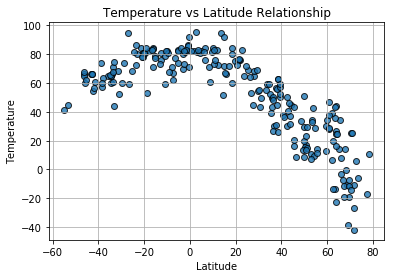

In [270]:
# Build a scatter plot for Latitude vs Temperature
plt.scatter(cities_df["Latitude"],
            cities_df["Temperature"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="LatvsTemp")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()

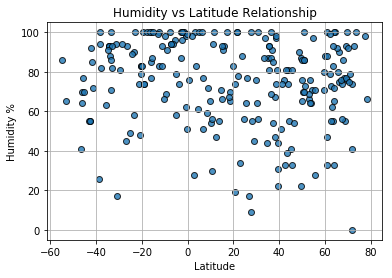

In [271]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(cities_df["Latitude"],
            cities_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="HumidityvsTemp")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("LatvsHum.png")

# Show plot
plt.show()

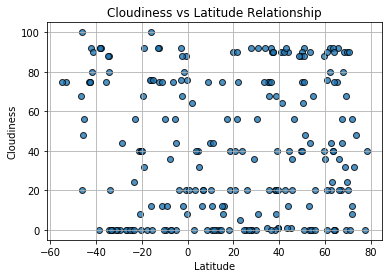

In [272]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(cities_df["Latitude"],
            cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="LatitudevsCloudiness")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("CloudvsLatitude.png")

# Show plot
plt.show()

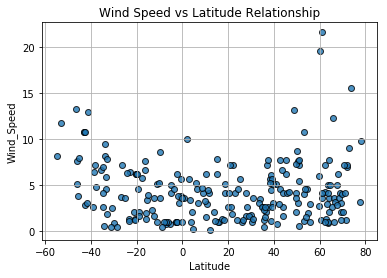

In [273]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"],
            cities_df["Wind_Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="LatitudevsWindSpeed")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude Relationship")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid(True)
#plt.xlim([-2.5, 202])

# Save the figure
plt.savefig("WindSpeedvsLatitude.png")

# Show plot
plt.show()